# IN3050/IN4050 Mandatory Assignment 3: Unsupervised Learning

**Name:**

**Username:**

### Rules

Before you begin the exercise, review the rules at this website: https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html , in particular the paragraph on cooperation. This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers with others. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo" https://www.uio.no/english/about/regulations/studies/studies-examinations/routines-cheating.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, April 22, 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

### Goals of the exercise
This exercise has three parts. The first part is focused on Principal Component Analysis (PCA). You will go through some basic theory, and implent PCA from scratch to do compression and visualization of data.

The second part focuses on clustering using K-means. You will use `scikit-learn` to run K-means clustering, and use PCA to visualize the results.

The last part ties supervised and unsupervised learning together in an effort to evaluate the output of K-means using a logistic regression for multi-class classification approach.

The master students will also have to do one extra part about tuning PCA to balance compression with information lost.


### Tools
You may freely use code from the weekly exercises and the published solutions. In the first part about PCA you may **NOT** use ML libraries like `scikit-learn`. In the K-means part and beyond we encurage the use of `scikit-learn` to iterate quickly on the problems.

### Beware
This is a new assignment. There might occur typos or ambiguities. If anything is unclear, do not hesitate to ask. Also, if you think some assumptions are missing, make your
own and explain them!

## Principal Component Analysis (PCA)
In this section, you will work with the PCA algorithm in order to understand its definition and explore its uses.

### Principle of Maximum Variance: what is PCA supposed to do?
First of all, let us recall the principle/assumption of PCA:

1. What is the variance?
3. What is the covariance?
3. How do we compute the covariance matrix?
2. What is the meaning of the principle of maximum variance?
4. Why do we need this principle?
5. Does the principle always apply?

**Answers:** 
 1. What is the variance?
     - The variance is a measure of how far away a dataset spreads out from its mean value. It is calculated by taking the square of the standard deviation.
 2. What is the covariance?
     - The covariance measures the relation between two datasets. If the covariance is high, it means that the two datasets are likely to have similar values (high/low) at the same time (they move in the same direction).
       If the covaiance is negative, it means that the datasets tend to have different values at the same time (they move in opposite directions). 
 3. How do we compute the covariance matrix?
     - Lets say we have a dataset $X \in \mathcal{R}^{N \times M}$, consisting of $N$ datapoints $\mathbf{x}_i = (\mathbf{x}_{1,i} \;, \mathbf{x}_{2,i}\;, \dots, \mathbf{x}_{M,i})$ with $M$ features.
       To calculate the covariance matrix $Cov(X)$ it would first be beneficial to centre the data in a new matrix $P$ by subtracting each column by its mean. 
       The covariance matrix can then be computed as $ Cov(X) = 1/N \cdot P^TP$.
 4. What is the meaning of the principle of maximum variance?
     - The principle of maximum variance means that we should rotate the dataset such that one of the axis point in the direction of the maximum  variance. 
 5. Why do we need this principle?
     - the principle of maximum variance should be followed to make sure that we keep as much information as possible when we remove dimensions from the original          dataset. If we don't follow the principle, we might end up with a clustering of non-separable data, which would be hard to analyze. 
 6. does the principle always apply?
     - Yes, because we always want to keep information about the different features in the dataset, and using the principle of maximum variance keeps the maximum amount of information.

## Implementation: how is PCA implemented?
Here we implement the basic steps of PCA and we assemble them.

### Importing libraries
We start importing the *numpy* library for performing matrix computations, the *pyplot* library for plotting data, and the *syntheticdata* module to import synthetic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import syntheticdata

### Centering the Data
Implement a function with the following signature to center the data as explained in *Marsland*.

In [10]:
def center_data(A):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # X    [NxM] numpy centered data matrix (N samples, M features)
    
    mean = np.mean(A, axis=0)

    return A - mean 

Test your function checking the following assertion on *testcase*:

In [11]:
testcase = np.array([[3.,11.,4.3],[4.,5.,4.3],[5.,17.,4.5],[4,13.,4.4]])
answer = np.array([[-1.,-0.5,-0.075],[0.,-6.5,-0.075],[1.,5.5,0.125],[0.,1.5,0.025]])
np.testing.assert_array_almost_equal(center_data(testcase), answer)

### Computing Covariance Matrix
Implement a function with the following signature to compute the covariance matrix as explained in *Marsland*.

In [12]:
def compute_covariance_matrix(A):
    # INPUT:
    # A    [NxM] centered numpy data matrix (N samples, M features)
    #
    # OUTPUT:
    # C    [MxM] numpy covariance matrix (M features, M features)
    #
    # Do not apply centering here. We assume that A is centered before this function is called.
    
    N, M = A.shape
    C = 1/N * A.T@A
    
    return C

Test your function checking the following assertion on *testcase*:

In [13]:
testcase = center_data(np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5],[28.,14.,7]]))
answer = np.array([[580.,290.,145.],[290.,145.,72.5],[145.,72.5,36.25]])

# Depending on implementation the scale can be different:
to_test = compute_covariance_matrix(testcase)

answer = answer/answer[0, 0]
to_test = to_test/to_test[0, 0]

np.testing.assert_array_almost_equal(to_test, answer)

### Computing eigenvalues and eigenvectors
Use the linear algebra package of `numpy` and its function `np.linalg.eig()` to compute eigenvalues and eigenvectors. Notice that we take the real part of the eigenvectors and eigenvalues. The covriance matrix *should* be a symmetric matrix, but the actual implementation in `compute_covariance_matrix()` can lead to small round off errors that lead to tiny imaginary additions to the eigenvalues and eigenvectors. These are purely numerical artifacts that we can safely remove.

**Note:** If you decide to NOT use `np.linalg.eig()` you must make sure that the eigenvalues you compute are of unit lenght!

In [16]:
def compute_eigenvalue_eigenvectors(A):
    # INPUT:
    # A    [DxD] numpy matrix
    #
    # OUTPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    
    eigval, eigvec = np.linalg.eig(A)
    
    
    # Numerical roundoff can lead to (tiny) imaginary parts. We correct that here.
    eigval = eigval.real
    eigvec = eigvec.real
    
    return eigval, eigvec

Test your function checking the following assertion on *testcase*:

In [17]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([2.,5.,3.])
answer2 = np.array([[1.,0.,0.],[0.,1.,0.],[0.,0.,1.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### Sorting eigenvalues and eigenvectors
Implement a function with the following signature to sort eigenvalues and eigenvectors as explained in *Marsland*.

Remember that eigenvalue *eigval[i]* corresponds to eigenvector *eigvec[:,i]*.

In [34]:
def sort_eigenvalue_eigenvectors(eigval, eigvec):
    # INPUT:
    # eigval    [D] numpy vector of eigenvalues
    # eigvec    [DxD] numpy array of eigenvectors
    #
    # OUTPUT:
    # sorted_eigval    [D] numpy vector of eigenvalues
    # sorted_eigvec    [DxD] numpy array of eigenvectors
    
    idxs = np.flip(np.argsort(eigval))
    sorted_eigval = eigval[idxs]
    sorted_eigvec = eigvec[:,idxs]
    
    return sorted_eigval, sorted_eigvec

Test your function checking the following assertion on *testcase*:

In [35]:
testcase = np.array([[2,0,0],[0,5,0],[0,0,3]])
answer1 = np.array([5.,3.,2.])
answer2 = np.array([[0.,0.,1.],[1.,0.,0.],[0.,1.,0.]])
x,y = compute_eigenvalue_eigenvectors(testcase)
x,y = sort_eigenvalue_eigenvectors(x,y)
np.testing.assert_array_almost_equal(x, answer1)
np.testing.assert_array_almost_equal(y, answer2)

### PCA Algorithm
Implement a function with the following signature to compute PCA as explained in *Marsland* using the functions implemented above.

In [54]:
def pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # pca_eigvec    [Mxm] numpy matrix containing the eigenvectors (M dimensions, m eigenvectors)
    # P             [Nxm] numpy PCA data matrix (N samples, m features)
    
    B = center_data(A)
    C = compute_covariance_matrix(B)
    eigval, eigvec = compute_eigenvalue_eigenvectors(C)
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    
    pca_eigval = sorted_eigval[:m]
    pca_eigvec = sorted_eigvec[:,:m]
    
    
    P = pca_eigvec.T @ B.T

    return pca_eigvec, P.T

Test your function checking the following assertion on *testcase*:

In [55]:
testcase = np.array([[22.,11.,5.5],[10.,5.,2.5],[34.,17.,8.5]])
x,y = pca(testcase,2)

import pickle
answer1_file = open('PCAanswer1.pkl','rb'); answer2_file = open('PCAanswer2.pkl','rb')
answer1 = pickle.load(answer1_file); answer2 = pickle.load(answer2_file)


test_arr_x = np.sum(np.abs(np.abs(x) - np.abs(answer1)), axis=0)
np.testing.assert_array_almost_equal(test_arr_x, np.zeros(2))


test_arr_y = np.sum(np.abs(np.abs(y) - np.abs(answer2)))
np.testing.assert_almost_equal(test_arr_y, 0)

## Understanding: how does PCA work?
We now use the PCA algorithm you implemented on a toy data set in order to understand its inner workings.

### Loading the data
The module *syntheticdata* provides a small synthetic dataset of dimension [100x2] (100 samples, 2 features).

In [320]:
X = syntheticdata.get_synthetic_data1()

### Visualizing the data
Visualize the synthetic data using the function *scatter()* from the *matplotlib* library.

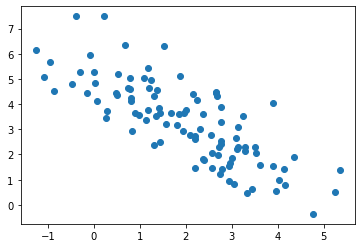

In [321]:
plt.scatter(X[:,0],X[:,1])
plt.show()

### Visualize the centered data
Notice that the data visualized above is not centered on the origin (0,0). Use the function defined above to center the data, and the replot it.

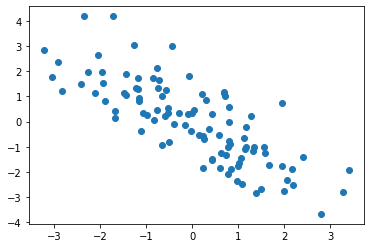

In [322]:
X = center_data(X)
plt.scatter(X[:,0], X[:,1])
plt.show()

### Visualize the first eigenvector
Visualize the vector defined by the first eigenvector.
To do this you need:
- Use the *PCA()* function to recover the eigenvectors
- Plot the centered data as done above 
- The first eigenvector is a 2D vector (x0,y0). This defines a vector with origin in (0,0) and head in (x0,y0). Use the function *plot()* from matplotlib to plot a line over the first eigenvector.

[ 0.65146842 -0.75867576]


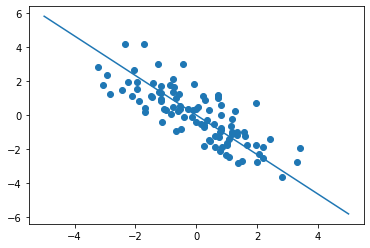

In [324]:
pca_eigvec, P = pca(X, 2)
first_eigvec = pca_eigvec[0]
print(first_eigvec)

plt.scatter(X[:,0],X[:,1])

x = np.linspace(-5, 5, 1000)
y = first_eigvec[1]/first_eigvec[0] * x
plt.plot(x,y)
plt.show()

### Visualize the PCA projection
Finally, use the *PCA()* algorithm to project on a single dimension and visualize the result using again the *scatter()* function.

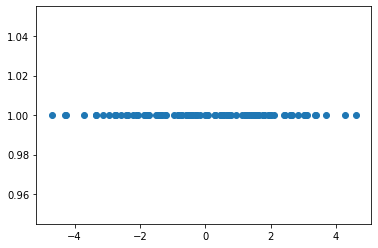

In [326]:
_,P = pca(X, 2)
N, m = P.shape
plt.scatter(P[:,0],np.ones(N))
plt.show()

## Evaluation: when are the results of PCA sensible?
So far we have used PCA on synthetic data. Let us now imagine we are using PCA as a pre-processing step before a classification task. This is a common setup with high-dimensional data. We explore when the use of PCA is sensible.

### Loading the first set of labels
The function *get_synthetic_data_with_labels1()* from the module *syntethicdata* provides a first labeled dataset.

In [327]:
X,y = syntheticdata.get_synthetic_data_with_labels1()


### Running PCA
Process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

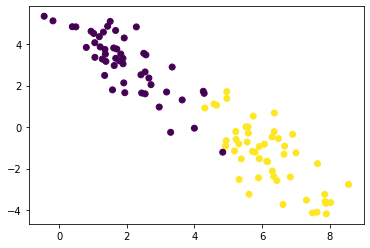

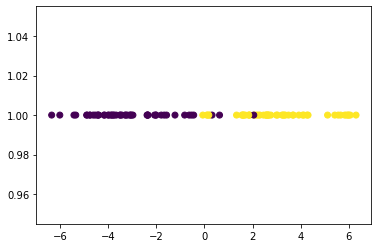

In [329]:
# Visualise the dataset from syntethicdata
plt.scatter(X[:,0],X[:,1],c=y[:,0])
plt.show()

# Process the data using PCA and project it in one dimension
N, M = X.shape
m = int(np.amax(y)+1)
plt.figure()
_,P = pca(X, m)
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])
plt.show()

**Comment:** 
 - We can see that the dataset is almost separable and have a high variance, both are characteristics that are preserved after using PCA. 
   In this case it seems that the use of PCA is reasonable. 

### Loading the second set of labels
The function *get_synthetic_data_with_labels2()* from the module *syntethicdata* provides a second labeled dataset.

In [377]:
X,y = syntheticdata.get_synthetic_data_with_labels2()

### Running PCA
As before, process the data using the PCA algorithm and project it in one dimension. Plot the labeled data using *scatter()* before and after running PCA. Comment on the results.

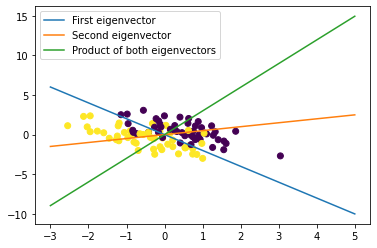

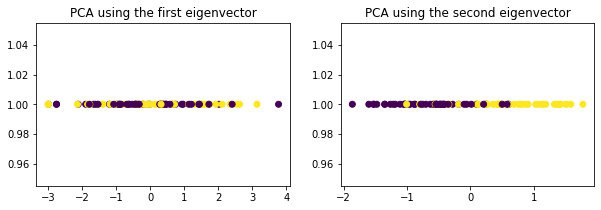

In [448]:
# Visualise the dataset from syntethicdata
X = center_data(X)
plt.scatter(X[:,0],X[:,1],c=y[:,0])

# Process the data using PCA 
N, M = X.shape
m = int(np.amax(y)+1)
eigvec,P = pca(X, m)

eigvec3 = eigvec[0] + eigvec[1]


x = np.linspace(-3, 5, 1000)
y_1 = eigvec[0][1]/eigvec[0][0] * x
y_2 = eigvec[1][1]/eigvec[1][0] * x
y_3 = eigvec3[1]/eigvec3[0] * x
plt.plot(x, y_1, label="First eigenvector")
plt.plot(x, y_2, label="Second eigenvector")
plt.plot(x, y_3, label="Product of both eigenvectors")

plt.legend()
plt.show()

fig, ax = plt.subplots(1, 2, figsize=(10, 3))

plt.subplot(1, 2, 1)
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y[:,0])
plt.title("PCA using the first eigenvector")

plt.subplot(1, 2, 2)
plt.scatter(P[:,1],np.ones(P.shape[0]),c=y[:,0])
plt.title("PCA using the second eigenvector")
plt.show()

In [422]:
# Calculate the cluster separation for the different eigenvectors using perceptron

from sklearn.linear_model import Perceptron

cluster11 = P[y[:,0]==0,0]
cluster12 = P[y[:,0]==1,0]

cluster21 = P[y[:,0]==0,1]
cluster22 = P[y[:,0]==1,1]

cluster1 = P[:,0].reshape(-1,1)
cluster2 = P[:,1].reshape(-1,1)

clf1 = Perceptron()
clf1.fit(cluster1, y[:,0])
score1 = clf1.score(cluster1, y[:,0])

clf2 = Perceptron()
clf2.fit(cluster2, y[:,0])
score2 = clf2.score(cluster2, y[:,0])

print(f"Score of perceptron using the first eigenvec  = {score1}")
print(f"Score of perceptron using the second eigenvec = {score2}")

      

Score of perceptron using the first eigenvec  = 0.5
Score of perceptron using the second eigenvec = 0.84


**Comment:** 
 - We see that using the first eigenvector we get bad separation between the classes as they lie on top of each other in the direction of maxmimum variance. However the result is more separable when using the second eigenvector, which means that it might be more beneficial in      this case to use the second eigenvectore instead. The second eigenvector is orthogonal to the first eigenvector so it will preserve more information from the data after PCA. Lastly we see that if we add the two vectors together we get a third vector that is also by definition an eigenvector, that can be used instead. It it represented in the figure above, and would possibly give even better separation in 1D. 

How would the result change if you were to consider the second eigenvector? Or if you were to consider both eigenvectors?

**Answer**: 
 - We have considered both the first and second eigenvecors and also made an assumption about the sum of the two. We see in the figure above that the second eigenvector produces the best results. We have also used the perceptron algorithm to study how separable the two resulting 1D datasets are. The results show that using the first eigenvector we get a precision of 0.5 (equivalent to guessing) while the second eigenvector gives a precision of 0.84, which is significantly better. 

## Case study 1: PCA for visualization
We now consider the *iris* dataset, a simple collection of data (N=150) describing iris flowers with four (M=4) features. The features are: Sepal Length, Sepal Width, Petal Length and Petal Width. Each sample has a label, identifying each flower as one of 3 possible types of iris: Setosa, Versicolour, and Virginica.

Visualizing a 4-dimensional dataset is impossible; therefore we will use PCA to project our data in 2 dimensions and visualize it.

### Loading the data
The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [450]:
X,y = syntheticdata.get_iris_data()

### Visualizing the data by selecting features
Try to visualize the data (using label information) by randomly selecting two out of the four features of the data. You may try different pairs of features.

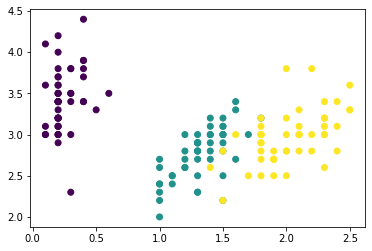

In [465]:
# Select two out of the four datasets
one, two = np.random.choice(4, size=2, replace=False)
X_= X[:,[one,two]]

# Visualise the dataset from syntethicdata
plt.scatter(X_[:,0],X_[:,1],c=y)

plt.show()


### Visualizing the data by PCA
Process the data using PCA and visualize it (using label information). Compare with the previous visualization and comment on the results.

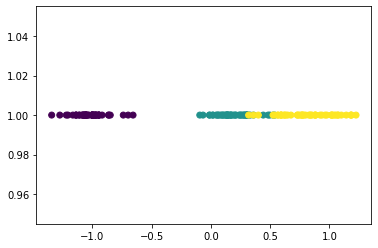

In [466]:

# Process the data using PCA and project it in one dimension
N, M = X_.shape
m = int(np.amax(y)+1)
plt.figure()
_,P = pca(X_, m)
plt.scatter(P[:,0],np.ones(P.shape[0]),c=y)
plt.show()

**Comment:** 
 - We see that the dataset consists of almost linearly separable data, and that the PCA tends to precerve this . 

## Case study 2: PCA for compression
We now consider the *faces in the wild (lfw)* dataset, a collection of pictures (N=1280) of people. Each pixel in the image is a feature (M=2914).

### Loading the data
The function *get_lfw_data()* from the module *syntethicdata* returns the *lfw* dataset. It returns a data matrix of dimension [1280x2914] and a label vector of dimension [1280]. It also returns two parameters, $h$ and $w$, reporting the height and the width of the images (these parameters are necessary to plot the data samples as images). Beware, it might take some time to download the data. Be patient :) 

In [467]:
X,y,h,w = syntheticdata.get_lfw_data()

### Inspecting the data
Choose one datapoint to visualize (first coordinate of the matrix $X$) and use the function [imshow()](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.imshow.html) to plot and inspect some of the pictures.

Notice that *imshow* receives as a first argument an image to be plot; the image must be provided as a rectangular matrix, therefore we reshape a sample from the matrix $X$ to have height $h$ and width $w$. The parameter *cmap* specifies the color coding; in our case we will visualize the image in black-and-white with different gradations of grey.

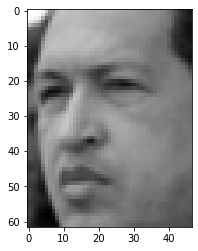

In [468]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)

### Implementing a compression-decompression function
Implement a function that first uses PCA to project samples in low-dimensions, and then reconstruct the original image.

*Hint:* Most of the code is the same as the previous PCA() function you implemented. You may want to refer to *Marsland* to check out how reconstruction is performed.

In [469]:
def encode_decode_pca(A,m):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # m    integer number denoting the number of learned features (m <= M)
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    P, eigvecs = pca(A, m)

    Ahat = eigvecs @ P.T
    
    return Ahat

In [470]:
def visualize_faces(X, nrows=1, ncols=4, title=None):
    """Helper function to visualize images"""
    fig, axs = plt.subplots(nrows, ncols, figsize=(nrows*5, ncols*2))
    if title:
        plt.title(title)
    for i in range(nrows*ncols):
            plt.subplot(nrows, ncols, i+1)
            plt.imshow(X[i,:].reshape((h,w)), cmap=plt.cm.gray)
            plt.axis('off')
        
    plt.tight_layout()
    plt.show()


### Compressing and decompressing the data
Use the implemented function to encode and decode the data by projecting on a lower dimensional space of dimension 200 (m=200).

In [471]:
Xhat = encode_decode_pca(X,200)


### Inspecting the reconstructed data
Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

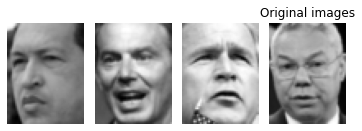

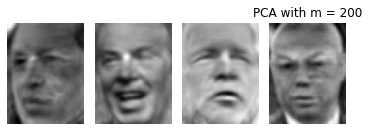

In [472]:
visualize_faces(X, title="Original images")
visualize_faces(Xhat, title="PCA with m = 200")

**Comment:** Enter your comment here.

### Evaluating different compressions
Use the previous setup to generate compressed images using different values of low dimensions in the PCA algorithm (e.g.: 100, 200, 500, 1000). Plot and comment on the results.

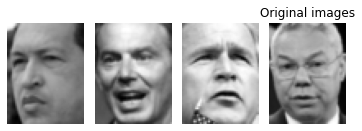

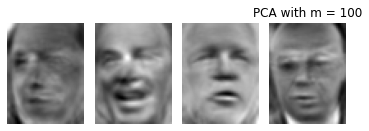

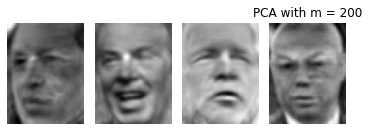

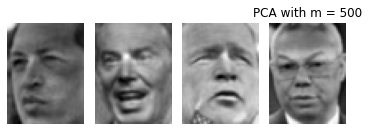

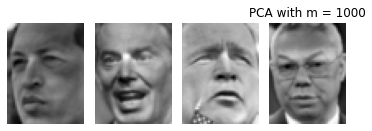

In [473]:
visualize_faces(X, title="Original images")

for m in [100, 200, 500, 1000]:
    Xhat = encode_decode_pca(X,m)
    visualize_faces(Xhat, title=f"PCA with {m = }")



**Comment:**
 - We see that (not surprisingly) the images become more distorted and less recognizable for lower values of m. 
   This is because we effectively remove features from the faces using PCA and only keep the m most relevant features.
   The interesting part is that even though the faces appear weird and distorted for low values of m, they are still recognizable, which means that they should still be usable as a simplified dataset. 

## Master Students: PCA Tuning
If we use PCA for compression or decompression, it may be not trivial to decide how many dimensions to keep. In this section we review a principled way to decide how many dimensions to keep.

The number of dimensions to keep is the only *hyper-parameter* of PCA. A method designed to decide how many dimensions/eigenvectors is the *proportion of variance*:
$$ \textrm{POV}=\frac{\sum_{i=1}^{m}{\lambda_{i}}}{\sum_{j=1}^{M}{\lambda_{j}}}, $$
where $\lambda$ are eigenvalues, $M$ is the dimensionality of the original data, and $m$ is the chosen lower dimensionality. 

Using the $POV$ formula we may select a number $M$ of dimensions/eigenvalues so that the proportion of variance is, for instance, equal to 95%.

Implement a new PCA for encoding and decoding that receives in input not the number of dimensions for projection, but the amount of proportion of variance to be preserved.

In [491]:
def encode_decode_pca_with_pov(A,p):
    # INPUT:
    # A    [NxM] numpy data matrix (N samples, M features)
    # p    float number between 0 and 1 denoting the POV to be preserved
    #
    # OUTPUT:
    # Ahat [NxM] numpy PCA reconstructed data matrix (N samples, M features)
    # m    integer reporting the number of dimensions selected
    N, M = A.shape
    
    B = center_data(A)
    C = compute_covariance_matrix(B)
    eigval, eigvec = compute_eigenvalue_eigenvectors(C)
    sorted_eigval, sorted_eigvec = sort_eigenvalue_eigenvectors(eigval, eigvec)
    
    
    
    sum_M = np.sum(sorted_eigval)
    target = p*sum_M
    
    sum = 0
    i = 0
    while sum < target or sum == target:
        sum += sorted_eigval[i]
        i += 1
        
    m = i
    
    pca_eigval = sorted_eigval[:m]
    pca_eigvec = sorted_eigvec[:,:m]
    
    
    P = pca_eigvec.T @ B.T
    P = P.T
    
    Ahat = pca_eigvec @ P.T
    
    
    return Ahat.T, m

p = 0.95
Ahat, m = encode_decode_pca_with_pov(X, p)

Import the *lfw* dataset using the *get_lfw_data()* in *syntheticdata*. Use the implemented function to encode and decode the data by projecting on a lower dimensional space such that POV=0.9. Use the function *imshow* to plot and compare original and reconstructed pictures. Comment on the results.

In [492]:
X,y,h,w = syntheticdata.get_lfw_data()

In [495]:
Xhat,m = encode_decode_pca_with_pov(X,0.9)
print(f'{m = }')

m = 85


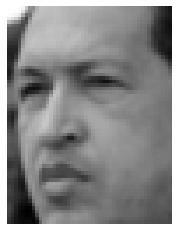

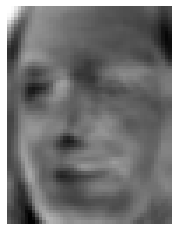

In [498]:
plt.imshow(X[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.axis('off')
plt.figure()
plt.imshow(Xhat[0,:].reshape((h, w)), cmap=plt.cm.gray)
plt.axis('off')
plt.show()

**Comment:** 
 - We see that the tuning sets m to 85 wich is a low value and leads to a pretty distorted face. This might mean that the algorithm thinks that is enough dimensions to keep while still keeping enough variance in the data. 

# K-Means Clustering (Bachelor and master students)
In this section you will use the *k-means clustering* algorithm to perform unsupervised clustering. Then you will perform a qualitative assesment of the results.

### Importing scikit-learn library
We start importing the module *cluster.KMeans* from the standard machine learning library *scikit-learn*.

In [351]:
from sklearn.cluster import KMeans

### Loading the data
We will use once again the *iris* data set. The function *get_iris_data()* from the module *syntethicdata* returns the *iris* dataset. It returns a data matrix of dimension [150x4] and a label vector of dimension [150].

In [352]:
X,y = syntheticdata.get_iris_data()

### Projecting the data using PCA
To allow for visualization, we project our data in two dimensions as we did previously. This step is not necessary, and we may want to try to use *k-means* later without the PCA pre-processing. However, we use PCA, as this will allow for an easy visualization.

In [353]:
_,P = pca(X, m=2)

### Running k-means
We will now consider the *iris* data set as an unlabeled set, and perform clustering to this unlabeled set. We can compare the results of the clustering to the lableled calsses.

Use the class *KMeans* to fit and predict the output of the *k-means* algorithm on the projected data. Run the algorithm using the following values of $k=\{2,3,4,5\}$. 

In [354]:
k = 2
KM = KMeans(k)
yhat2 = KM.fit_predict(P)


In [355]:
def visualize_KMeans(X, y, P, k=[2, 3, 4, 5]):
    nrows = 1
    ncols = len(k)
    fig, axs = plt.subplots(nrows, ncols, figsize=(18, 3))
    i = 0
    for j in range(ncols):
        plt.subplot(nrows, ncols, j+1)
        KM = KMeans(k[j])
        yhat = KM.fit_predict(P)
        plt.scatter(P[:,0], P[:,1], c=yhat)
        plt.title(f'k = {k[j]}')
        
    plt.show()

        

### Qualitative assessment
Plot the results of running the k-means algorithm, compare with the true labels, and comment.

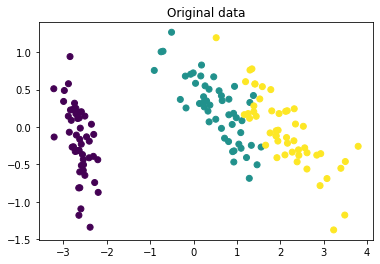

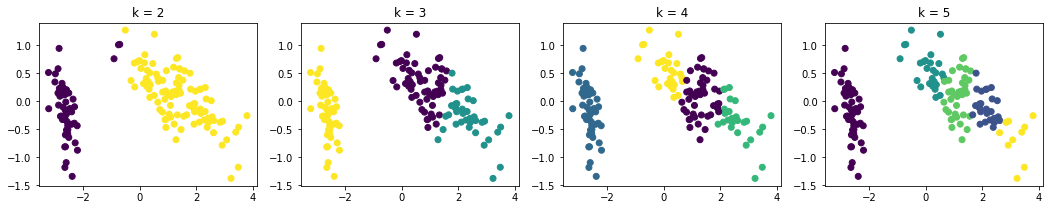

In [357]:

plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')

visualize_KMeans(X, y, P)

**Comment:**
 - We see that the K-Means algorithm manages to separate clusters effectively and that for k=3 it resembles the original data quite accurately. However, it does not know how to label the clusters, so the actual accuracy is close to useless. 

# Quantitative Assessment of K-Means (Bachelor and master students)

We used k-means for clustering and we assessed the results qualitatively by visualizing them. However, we often want to be able to measure in a quantitative way how good the clustering was. To do this, we will use a classification task to evaluate numerically the goodness of the representation learned via k-means.

Reload the *iris* dataset. Import a standard `LogisticRegression` classifier from the module `sklearn.linear_model`. Use the k-means representations learned previously (`yhat2,...,yhat5`) and the true label to train the classifier. Evaluate your model on the training data (we do not have a test set, so this procedure will assess the model fit instead of generalization) using the `accuracy_score()` function from the *sklearn.metrics* module. Plot a graph showing how the accuracy score varies when changing the value of k. Comment on the results.

- Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.
- Report the model fit/accuracy on the training set.
- For each value of K:
  - One-Hot-Encode the classes output by the K-means algorithm.
  - Train a Logistic regression model on the K-means classes as input vs the real classes as targets.
  - Calculate model fit/accuracy vs. value of K.
- Plot your results in a graph and comment on the K-means fit.

In [358]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score

from tabulate import tabulate


In [359]:
# Load the iris dataset 
X,y = syntheticdata.get_iris_data()
_, P = pca(X, 2)

In [360]:
# Make training-, validation- and testing datasets.
# We split into 80% for training and 20% for testing.
indices = np.arange(X.shape[0])
rng = np.random.RandomState(2022)
rng.shuffle(indices)
indices[:10]

X_train = X[indices[:120],:]
X_test = X[indices[120:],:]
y_train = y[indices[:120]]
y_test = y[indices[120:]]


In [361]:
# Calculate the PCA for X and X_train 

_, P = pca(X, 2)
_, P_train = pca(X_train, 2)

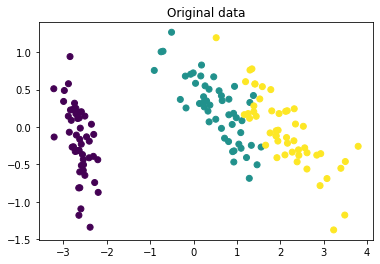

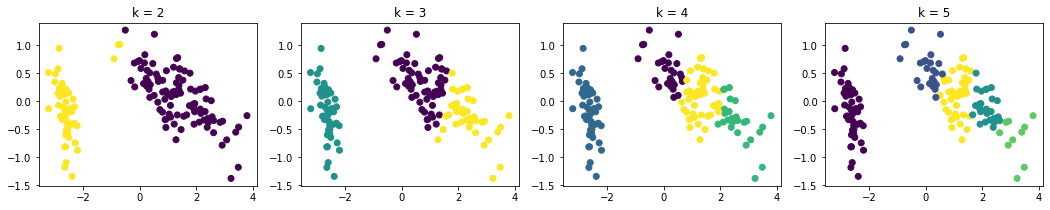

In [362]:


# Calculate the k-means representations for k in [2, 3, 4, 5]
yhats = []
for k in [2, 3, 4, 5]:
    KM = KMeans(k)
    yhats.append(KM.fit_predict(P))

# Visualize the data
plt.figure()
plt.scatter(P[:,0],P[:,1],c=y)
plt.title('Original data')

visualize_KMeans(X, y, P)


In [364]:
# Train a Logistic regression model using the first two dimensions of the PCA of the iris data set as input, and the true classes as targets.

logreg = LogisticRegression()
logreg.fit(P, y)


LogisticRegression()

In [365]:
# Make a report of the model fit/accuracy on the training set.
y_pred = logreg.predict(P)
acc = accuracy_score(y, y_pred)
print(f'The accuracy score on the training set is: {acc:.3f}')

The accuracy score on the training set is: 0.967


k = 2, acc = 0.667
k = 3, acc = 0.887
k = 4, acc = 0.840
k = 5, acc = 0.900


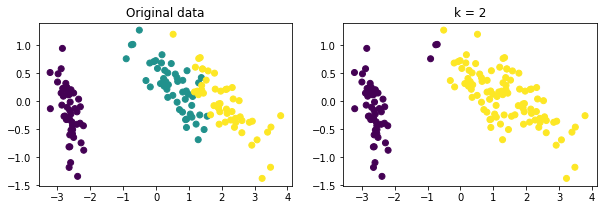

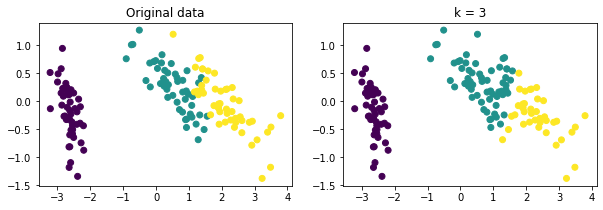

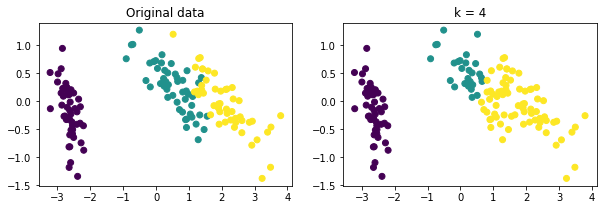

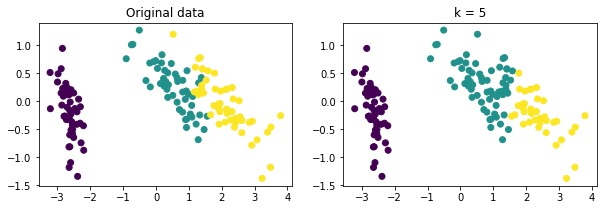

In [368]:
accuracies = []
# Loop over the different k-values
for k in [2, 3, 4, 5]:
    # Calculate the K-means for k on P
    KM = KMeans(k)
    yhat = KM.fit_predict(P)

    # One-hot-encode the classes output by K-Means
    yhat_new = np.eye(k)[yhat]
    
    # Train the logistic regression model using the one-hot-encoded classes from the K-means algorithm
    logreg = LogisticRegression()
    logreg.fit(yhat_new, y)
    
    # Make predictions and calculate the accuracy
    y_pred = logreg.predict(yhat_new)
    acc = accuracy_score(y, y_pred)
    accuracies.append(acc)
    print(f'{k = }, {acc = :.3f}')
    
    # Visualize the results
    
    fig, ax = plt.subplots(1, 2, figsize=(10, 3))
    
    plt.subplot(1, 2, 1)
    plt.scatter(P[:,0], P[:,1], c=y)
    plt.title('Original data')
    
    plt.subplot(1, 2, 2)
    plt.scatter(P[:,0],P[:,1],c=y_pred)
    plt.title(f'{k = }')
    
    


Text(0.5, 1.0, 'Accuracy for different values of k')

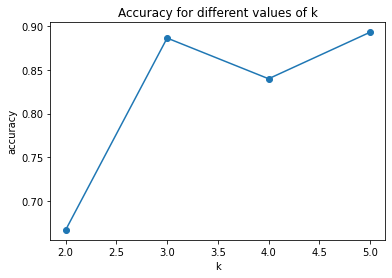

In [367]:
# Make a graph that visualizes the accuracy for different k-vals

x = np.arange(len(accuracies)) + 2

plt.plot(x, accuracies, marker='o')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('Accuracy for different values of k')

**Comment:** 
 - We see that using K-Means clustering is pretty effective for labeling the data. We get a good accuracy of 90% already for k=5 and would excpect that to be higher for larger values of k. We do, however, have to use logistic regression for labeling the data correctly and since the logistic regression classifier performed with an accuracy of 96% I wonder why we don't just use that alone instead. 

# Conclusions 

In this notebook we studied **unsupervised learning** considering two important and representative algorithms: **PCA** and **k-means**.

First, we implemented the PCA algorithm step by step; we then run the algorithm on synthetic data in order to see its working and evaluate when it may make sense to use it and when not. We then considered two typical uses of PCA: for **visualization** on the *iris* dataset, and for **compression-decompression** on the *lfw* dateset.

We then moved to consider the k-means algorithm. In this case we used the implementation provided by *scikit-learn* and we applied it to another prototypical unsupervised learning problem: **clustering**; we used *k-means* to process the *iris* dataset and we evaluated the results visually.

In the final part, we considered two additional questions that may arise when using the above algorithms. For PCA, we considered the problem of **selection of hyper-parameters**, that is, how we can select the hyper-parameter of ou algorithm in a reasonable fashion. For k-means, we considered the problem of the **quantitative evaluation** of our results, that is, how can we measure the performance or usefulness of our algorithms. 